In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.animation as animation
from IPython.display import HTML

In [5]:
covid_county=pd.read_csv('data/us-counties.csv',  encoding='latin-1')
covid_county_sorted = covid_county.sort_values(by=['state', 'county', 'date'])
covid_county_sorted

,date,county,state,fips,cases,deaths
9481,2020-03-24,Autauga,Alabama,1001.0,1,0
10838,2020-03-25,Autauga,Alabama,1001.0,4,0
1934,2020-03-14,Baldwin,Alabama,1003.0,1,0
2309,2020-03-15,Baldwin,Alabama,1003.0,1,0
2738,2020-03-16,Baldwin,Alabama,1003.0,1,0
...,...,...,...,...,...,...
7115,2020-03-21,Teton,Wyoming,56039.0,2,0
8253,2020-03-22,Teton,Wyoming,56039.0,2,0
9480,2020-03-23,Teton,Wyoming,56039.0,2,0
10837,2020-03-24,Teton,Wyoming,56039.0,3,0


In [6]:
county= pd.read_csv('data/with_Counties.csv',  encoding='latin-1')
county_sorted= county.sort_values(by=['state', 'county', 'primary_city'])
county_sorted

,zip,primary_city,state,latitude,longitude,county,type,world_region,country,decommissioned,estimated_population,notes
14992,34001,Apo,AA,0.00,0.00,NaN,MILITARY,CA,NI,1,0,"; Decommisioned, from MPSA Ballot;Country and ..."
14995,34006,Apo,AA,0.00,0.00,NaN,MILITARY,NaN,US,0,0,NaN
14998,34009,Apo,AA,0.00,0.00,NaN,MILITARY,SA,GY,1,0,"; Decommisioned, from MPSA Ballot;Country and ..."
14999,34010,Apo,AA,0.00,0.00,NaN,MILITARY,CA,HN,1,0,"; Decommisioned, from MPSA Ballot;Country and ..."
15015,34038,Apo,AA,0.00,0.00,NaN,MILITARY,NaN,US,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
35917,82401,Worland,WY,44.00,-107.95,Washakie,STANDARD,NaN,US,0,6629,NaN
35975,82715,Four Corners,WY,44.08,-104.13,Weston,STANDARD,NaN,US,0,0,NaN
35970,82701,Newcastle,WY,43.84,-104.21,Weston,STANDARD,NaN,US,0,4410,NaN
35981,82723,Osage,WY,43.98,-104.42,Weston,STANDARD,NaN,US,0,0,NaN


## Animation of New York case data.

In [8]:
covid_county_location=pd.merge(
    covid_county_sorted, county_sorted[['latitude', 'longitude', 'county', 'estimated_population']], on='county')

,date,county,state,fips,cases,deaths,latitude,longitude,estimated_population
0,2020-03-24,Autauga,Alabama,1001.0,1,0,32.43,-86.65,1628
1,2020-03-24,Autauga,Alabama,1001.0,1,0,32.66,-86.70,1117
2,2020-03-24,Autauga,Alabama,1001.0,1,0,32.47,-86.53,0
3,2020-03-24,Autauga,Alabama,1001.0,1,0,32.60,-86.88,828
4,2020-03-24,Autauga,Alabama,1001.0,1,0,32.64,-86.54,1822
...,...,...,...,...,...,...,...,...,...
1010057,2020-03-25,Sweetwater,Wyoming,56037.0,1,0,41.67,-109.19,0
1010058,2020-03-25,Sweetwater,Wyoming,56037.0,1,0,41.59,-109.22,21310
1010059,2020-03-25,Sweetwater,Wyoming,56037.0,1,0,41.59,-109.22,2200
1010060,2020-03-25,Sweetwater,Wyoming,56037.0,1,0,41.76,-108.96,0


In [9]:
NY = covid_county_location[covid_county_location['state'] == 'New York']

In [27]:
len(NY[NY['estimated_population'] > 0])/len(NY)

0.7090251765714393

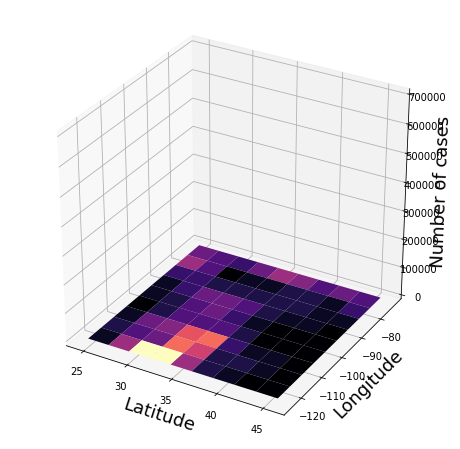

In [19]:

dates = np.sort(NY.date.unique())

H1, xedges, yedges = np.histogram2d(NY['latitude'], NY['longitude'])
def animate(i, plot):
    # simulate new data coming in
    ax.clear()
    date = dates[i]
    NY_date = NY[NY['date']== date]
    H, xedges, yedges = np.histogram2d(NY_date['latitude'], NY_date['longitude'], 
                                       weights=NY_date['cases'])
    plot = ax.plot_surface(X, Y, H, cmap='magma')
#     ax.set_zlim(0,np.max(H))
#     ax.set_zlim(0, np.max(H1))
    ax.set_zlim(0, 150*np.max(NY['cases']))
    ax.set_zlabel('Number of cases', fontsize=18)
    ax.set_xlabel('Latitude', fontsize=18)
    ax.set_ylabel('Longitude', fontsize=18)
    lab = date
    ax.text(25, 120, 500000, lab, color='black')
    return plot,


X, Y = np.meshgrid(xedges[:-1], yedges[:-1])
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
plot = [ax.plot_surface(X, Y, H1, cmap='magma')]
ax.set_zlim(0, 150*np.max(NY['cases']))
ax.set_zlabel('Number of cases', fontsize=18)
ax.set_xlabel('Latitude', fontsize=18)
ax.set_ylabel('Longitude', fontsize=18)
# ax.set_xlim(left[0], right[-1])
# ax.set_ylim(bottom.min(), top.max())

ani = animation.FuncAnimation(fig, animate, len(dates), fargs=(plot), repeat=False, blit=True)

In [20]:
HTML(ani.to_html5_video())

In [21]:
len(dates)

22